In [1]:
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

boston_1 = load_boston()
boston = pd.DataFrame(boston_1.data, columns=boston_1.feature_names)
boston['MEDV'] = boston_1.target

info={'CRIM' :    'per capita crime rate by town',
        'ZN' :      'proportion of residential land zoned for lots over 25,000 sq.ft',
        'INDUS'    :'proportion of non-retail business acres per town',            
        'CHAS'     :'Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
         'NOX'      :'nitric oxides concentration (parts per 10 million)',
         'RM'      : 'average number of rooms per dwelling',
        'AGE'     :'proportion of owner-occupied units built prior to 1940',
        'DIS'      :'weighted distances to five Boston employment centres',
        'RAD'      :'index of accessibility to radial highways',
         'TAX'      :'full-value property-tax rate per $10,000',
         'PTRATIO'  :'pupil-teacher ratio by town',
         'B'        :'1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
         'LSTAT'    :'% lower status of the population',
         'MEDV'     :'Median value of owner-occupied homes in $1000s'}

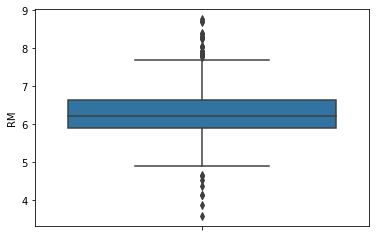

In [2]:
sns.boxplot(y='RM',data=boston)

In [3]:
boston[boston['RM']<=5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
144,2.77974,0.0,19.58,0.0,0.871,4.903,97.8,1.3459,5.0,403.0,14.7,396.90,29.29,11.8
147,2.36862,0.0,19.58,0.0,0.871,4.926,95.7,1.4608,5.0,403.0,14.7,391.71,29.53,14.6
310,2.63548,0.0,9.90,0.0,0.544,4.973,37.8,2.5194,4.0,304.0,18.4,350.45,12.64,16.1
365,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12,27.5
366,3.69695,0.0,18.10,0.0,0.718,4.963,91.4,1.7523,24.0,666.0,20.2,316.03,14.00,21.9
367,13.52220,0.0,18.10,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,23.1
368,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
373,11.10810,0.0,18.10,0.0,0.668,4.906,100.0,1.1742,24.0,666.0,20.2,396.90,34.77,13.8
374,18.49820,0.0,18.10,0.0,0.668,4.138,100.0,1.1370,24.0,666.0,20.2,396.90,37.97,13.8
384,20.08490,0.0,18.10,0.0,0.700,4.368,91.2,1.4395,24.0,666.0,20.2,285.83,30.63,8.8


In [7]:
boston[boston['MEDV']>=50.0]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
161,1.46336,0.0,19.58,0.0,0.6050,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1.0,0.6050,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0.0,0.6050,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,50.0
186,0.05602,0.0,2.46,0.0,0.4880,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45,50.0
195,0.01381,80.0,0.46,0.0,0.4220,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0
225,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
257,0.61154,20.0,3.97,0.0,0.6470,8.704,86.9,1.8010,5.0,264.0,13.0,389.70,5.12,50.0
267,0.57834,20.0,3.97,0.0,0.5750,8.297,67.0,2.4216,5.0,264.0,13.0,384.54,7.44,50.0


In [9]:
final_boston=boston[['INDUS','NOX','RM','TAX','PTRATIO','LSTAT','MEDV']]

In [14]:
a=final_boston[final_boston['MEDV']>=50.0].index
a

Int64Index([161, 162, 163, 166, 186, 195, 204, 225, 257, 267, 283, 368, 369,
            370, 371, 372],
           dtype='int64')

In [15]:
final_boston.drop(index=a,inplace=True)

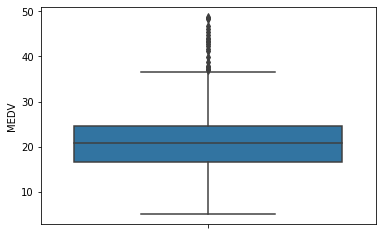

In [17]:
sns.boxplot(y='MEDV',data=final_boston)

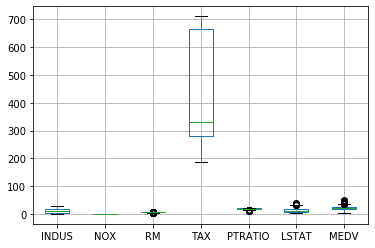

In [18]:
final_boston.boxplot()